# Exploratory Data analisys

In [364]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 10, 5

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [365]:
heart = pd.read_csv("heart.csv")

In [366]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [367]:
heart.shape

(303, 14)

In [368]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [369]:
heart.groupby("sex")["target"].count()

sex
0     96
1    207
Name: target, dtype: int64

### Plot categorical features

<Figure size 720x360 with 0 Axes>

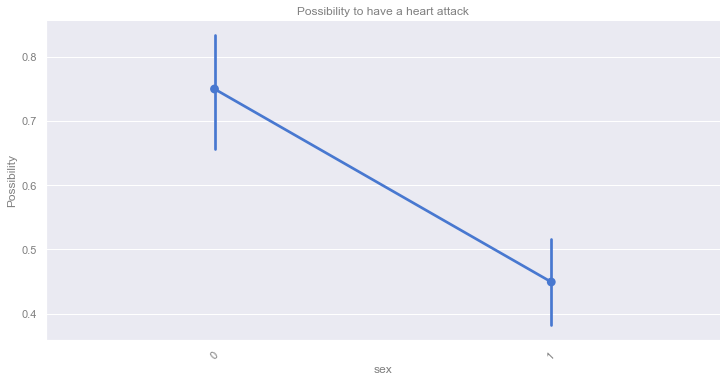

<Figure size 720x360 with 0 Axes>

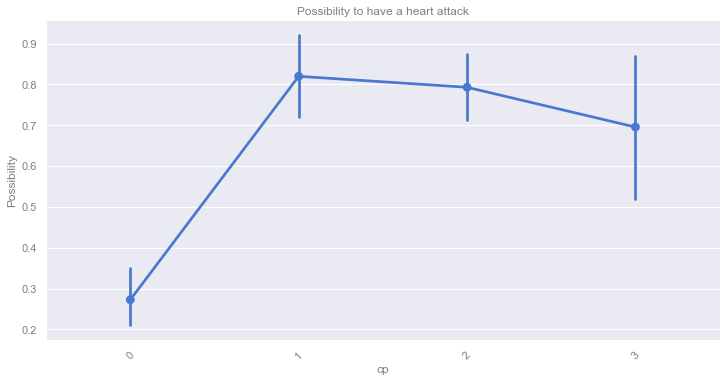

<Figure size 720x360 with 0 Axes>

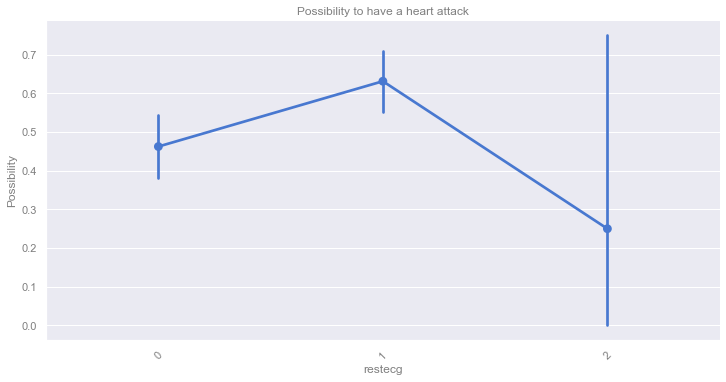

<Figure size 720x360 with 0 Axes>

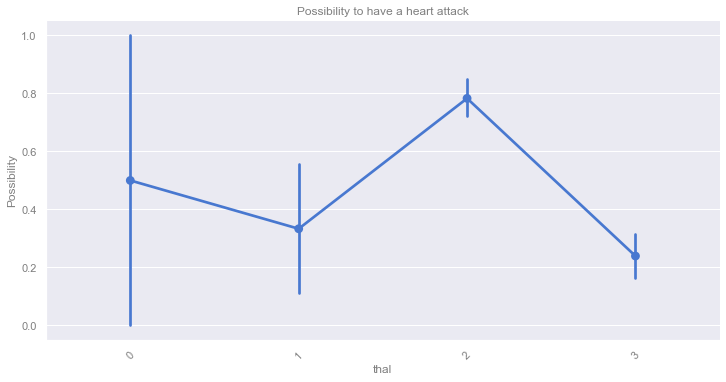

In [370]:
for i, col in enumerate(["sex", "cp", "restecg", "thal"]):
    plt.figure(i)
    sns.catplot(x=col, y="target", data=heart, kind="point", aspect=2)
   
    plt.xticks(rotation= 45)
    plt.tick_params(axis='both', colors='grey')
    plt.ylabel("Possibility", fontdict={"color":"grey"})
    plt.xlabel(col, fontdict={"color":"grey"})
    plt.title("Possibility to have a heart attack", fontdict={"color":"grey"})
    plt.show()

### Plot continuous features

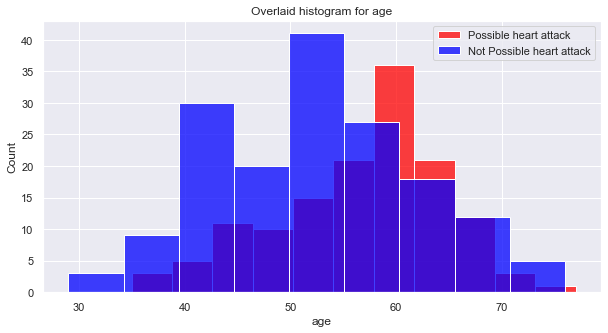

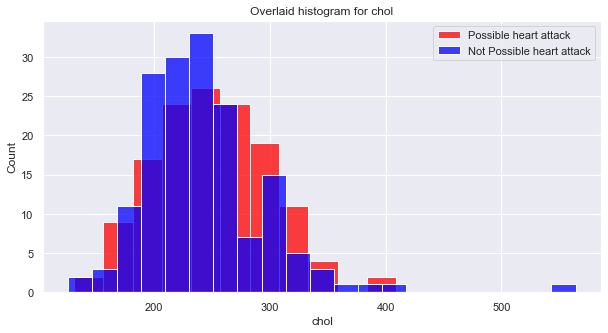

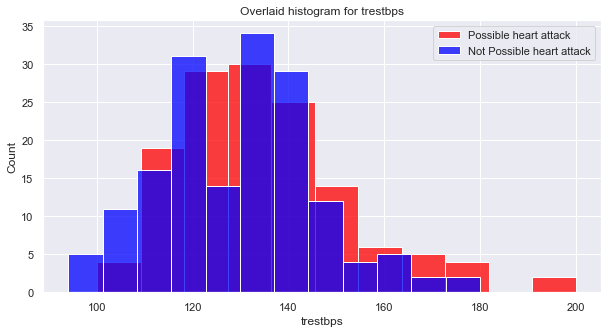

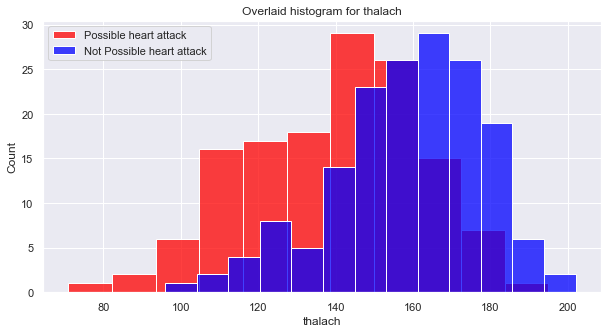

In [371]:
for i in ["age", "chol","trestbps", "thalach"]:
    possible_HA= heart[heart["target"]==0]
    not_possible_HA= heart[heart["target"]==1]
    sns.set(style = 'darkgrid', palette= 'muted')
    sns.histplot(possible_HA[i], kde=False, color="red")
    sns.histplot(not_possible_HA[i], kde=False, color="blue")
    plt.legend(["Possible heart attack", "Not Possible heart attack"])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()

#### From the above graphs we can understand that people with lower thalach( maximum heart rate achieved) are more possible to have a heart attack, also in chol there are outliers.

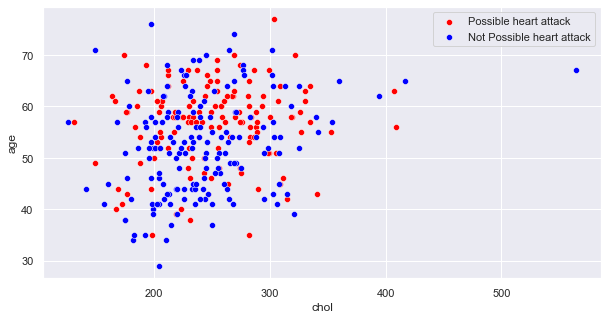

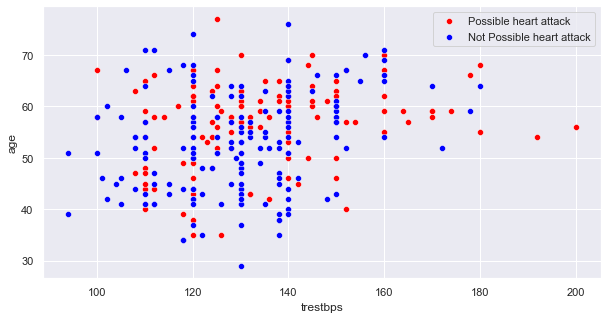

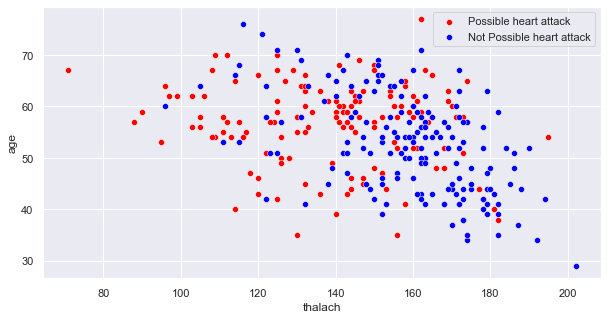

In [372]:
for i in ["chol", "trestbps", "thalach"]:
    possible_HA= heart[heart["target"]==0]
    not_possible_HA= heart[heart["target"]==1]
    
    sns.set(style = 'darkgrid', palette= 'muted')
    sns.scatterplot(x= possible_HA[i], y= possible_HA["age"], color="red")
    sns.scatterplot(x= not_possible_HA[i], y= not_possible_HA["age"], color="blue")
    plt.legend(["Possible heart attack", "Not Possible heart attack"])
    plt.show()

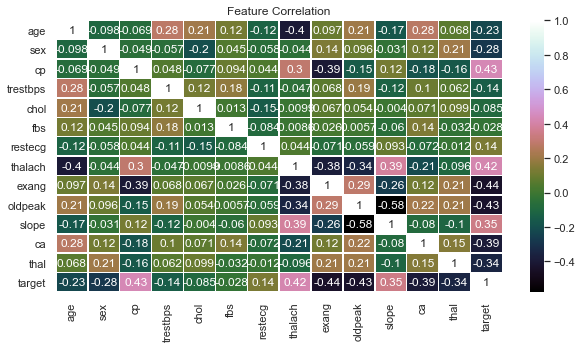

In [373]:
sns.heatmap(heart.corr(), annot = True, linewidths=.5, cmap="cubehelix")
plt.title("Feature Correlation")
plt.show()

#### Our target (high-low chance of heart attack) has a positive correlation(not high) whith cp(0.43), thalach(0.42), slope(0.35) and a neggative corelation(not high) with oldpeak(-0.43) and exang(-0.44).

## Fix Outliers

In [374]:
heart["chol"].clip(upper=heart["chol"].quantile(0.99), inplace=True)

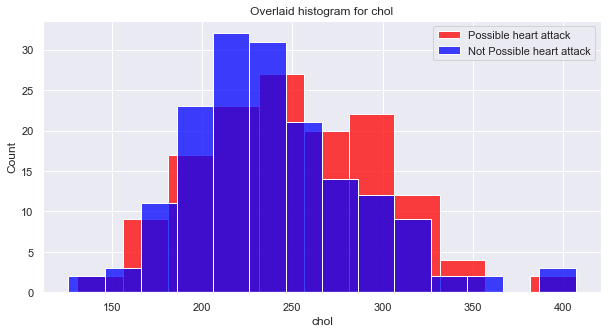

In [375]:
possible_HA= heart[heart["target"]==0]
not_possible_HA= heart[heart["target"]==1]
sns.set(style = 'darkgrid', palette= 'muted')
sns.histplot(possible_HA["chol"], kde=False, color="red")
sns.histplot(not_possible_HA["chol"], kde=False, color="blue")
plt.legend(["Possible heart attack", "Not Possible heart attack"])
plt.title("Overlaid histogram for {}".format("chol"))
plt.show()

# Train- test- split

In [376]:
features = heart.drop(["target"], axis=1)
target = heart["target"]

In [377]:
tr_features, x_test, tr_labels, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
val_features, te_features, val_labels, te_labels = train_test_split(x_test, y_test, test_size = 0.33, random_state = 42)

In [378]:
for dataset in [tr_labels, val_labels, te_labels]:
    print(round(len(dataset) / len(target), 2))

0.75
0.17
0.09


# Scaling

In [379]:
ss = StandardScaler()
tr_features = ss.fit_transform(tr_features)
val_features = ss.transform(val_features)
te_features = ss.transform(te_features)

# Machine learning- Training models- Classification

In [380]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn. model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from time import time

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)



### Define a function that prints results and depicts the performance of the model in the training set and test set

In [381]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    train_means=[]
    test_means=[]
    train_means.append(results.cv_results_["mean_train_score"])
    test_means.append(results.cv_results_["mean_test_score"])
    train_out = np.concatenate(train_means).ravel().tolist()
    test_out = np.concatenate(test_means).ravel().tolist()
    
    testMeans = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    for mean, std, params in zip(testMeans, stds, results.cv_results_["params"]):
        print("{} (+/-{}) for {}".format(round(mean, 3), round(std*2, 3), params))
    
    values = [i for i in range(1, 13)]
    plt.plot(values, train_out, '-o', label='Train')
    plt.plot(values, test_out, '-o', label='Test')
    plt.legend()
    plt.show()

# Random Forest Classifier

BEST PARAMS: {'max_depth': 3, 'n_estimators': 150}

0.811 (+/-0.06) for {'max_depth': 2, 'n_estimators': 50}
0.828 (+/-0.092) for {'max_depth': 2, 'n_estimators': 150}
0.784 (+/-0.053) for {'max_depth': 2, 'n_estimators': 100}
0.815 (+/-0.073) for {'max_depth': 2, 'n_estimators': 200}
0.815 (+/-0.102) for {'max_depth': 3, 'n_estimators': 50}
0.832 (+/-0.109) for {'max_depth': 3, 'n_estimators': 150}
0.828 (+/-0.096) for {'max_depth': 3, 'n_estimators': 100}
0.81 (+/-0.079) for {'max_depth': 3, 'n_estimators': 200}
0.811 (+/-0.072) for {'max_depth': 4, 'n_estimators': 50}
0.819 (+/-0.072) for {'max_depth': 4, 'n_estimators': 150}
0.819 (+/-0.104) for {'max_depth': 4, 'n_estimators': 100}
0.806 (+/-0.105) for {'max_depth': 4, 'n_estimators': 200}


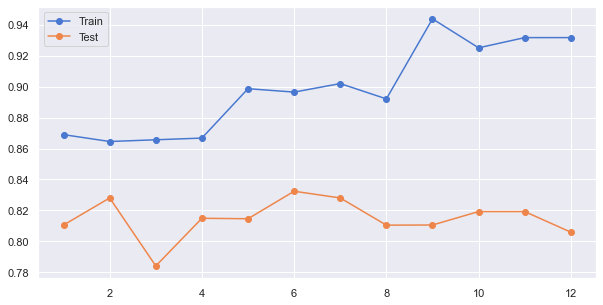

In [382]:
rf = RandomForestClassifier()

parameters= {
    'n_estimators':[50, 150, 100, 200],
    'max_depth':[2, 3, 4]
}

cv = GridSearchCV(rf, parameters, cv=5, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv) 

In [383]:
rf_best=cv.best_estimator_

# XG Boost Classifier

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


BEST PARAMS: {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1}

0.758 (+/-0.101) for {'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 25, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1}
0.771 (+/-0.111) for {'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1}
0.797 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1}
0.771 (+/-0.111) for {'learning_rate': 0.025, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 25, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1}
0.815 (+/-0.067) for {'learning_rate': 0.025, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:squarederror', 'reg_alpha': 0, 

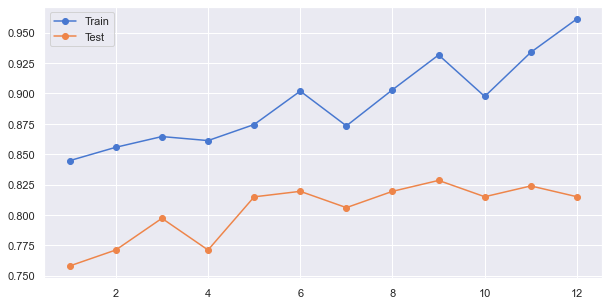

In [384]:
lr = XGBClassifier()

parameters= {
    "objective": ["reg:squarederror"],
    'n_estimators':[25, 50, 100],
    'learning_rate': [0.01, 0.025, 0.05, 0.1],
    'max_depth': [2],
    'min_child_weight': [1],
    "reg_alpha": [0],
    "reg_lambda": [1]
}

cv = GridSearchCV(lr, parameters, cv=5, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv) 

In [385]:
xgb_best = cv.best_estimator_

# Support vector Classifier

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.546 (+/-0.017) for {'C': 0.01, 'kernel': 'rbf'}
0.797 (+/-0.097) for {'C': 0.01, 'kernel': 'linear'}
0.797 (+/-0.076) for {'C': 0.1, 'kernel': 'rbf'}
0.828 (+/-0.122) for {'C': 0.1, 'kernel': 'linear'}
0.797 (+/-0.121) for {'C': 0.25, 'kernel': 'rbf'}
0.819 (+/-0.12) for {'C': 0.25, 'kernel': 'linear'}
0.797 (+/-0.11) for {'C': 0.3, 'kernel': 'rbf'}
0.815 (+/-0.124) for {'C': 0.3, 'kernel': 'linear'}
0.81 (+/-0.092) for {'C': 0.5, 'kernel': 'rbf'}
0.806 (+/-0.144) for {'C': 0.5, 'kernel': 'linear'}
0.797 (+/-0.049) for {'C': 1, 'kernel': 'rbf'}
0.806 (+/-0.144) for {'C': 1, 'kernel': 'linear'}


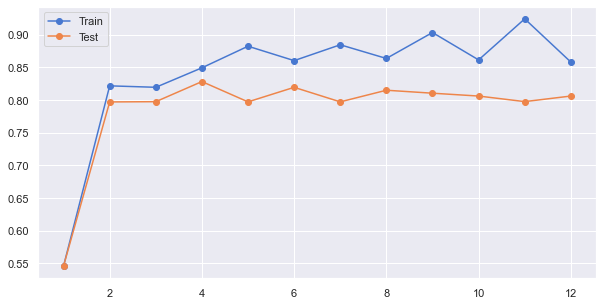

In [386]:
svc = SVC()

parameters= {
    'kernel':["rbf", "linear"],
    'C':[0.01, 0.1, 0.25, 0.3, 0.5, 1]
}

cv = GridSearchCV(svc, parameters, cv=5, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv) 

In [387]:
svc_best = cv.best_estimator_

# Multi-layer Perceptron Classifier

C:\Users\Intel PC G5900\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  warnings.warn(


BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (5,), 'learning_rate': 'invscaling', 'max_iter': 2200}

0.824 (+/-0.118) for {'activation': 'logistic', 'hidden_layer_sizes': (5,), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.806 (+/-0.133) for {'activation': 'logistic', 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive', 'max_iter': 2200}
0.815 (+/-0.133) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.815 (+/-0.133) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'max_iter': 2200}
0.793 (+/-0.092) for {'activation': 'logistic', 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.815 (+/-0.142) for {'activation': 'logistic', 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'max_iter': 2200}
0.823 (+/-0.14) for {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'learning_rate': 'invscaling', 'max_iter': 2200}
0.801 (+/

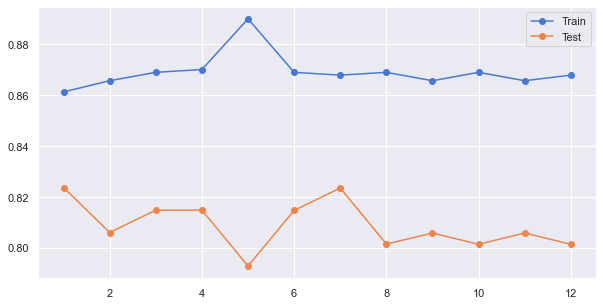

In [388]:
mlp = MLPClassifier()

parameters= {
    'hidden_layer_sizes': [(5,),(10,),(20,),(40,), (50,), (100,)],
    'activation': ["logistic"],
    "learning_rate": ["invscaling", "adaptive"],
    "max_iter": [2200]
}

cv = GridSearchCV(mlp, parameters, cv=5, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv) 

In [389]:
mlp_best = cv.best_estimator_

# Gradient Boosting Classifier

BEST PARAMS: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 4}

0.736 (+/-0.095) for {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 2}
0.788 (+/-0.055) for {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 3}
0.78 (+/-0.082) for {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 4}
0.806 (+/-0.088) for {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 5}
0.78 (+/-0.085) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 2}
0.793 (+/-0.082) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 3}
0.824 (+/-0.102) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 4}
0.797 (+/-0.118) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 5}
0.78 (+/-0.085) for {'learning_rate': 0.55, 'max_depth': 2, 'n_estimators': 2}
0.793 (+/-0.087) for {'learning_rate': 0.55, 'max_depth': 2, 'n_estimators': 3}
0.806 (+/-0.077) for {'learning_rate': 0.55, 'max_depth': 2, 'n_estimators': 4}
0.793 (+/-0.135) for {'learning_rate': 0.55, 'max_depth

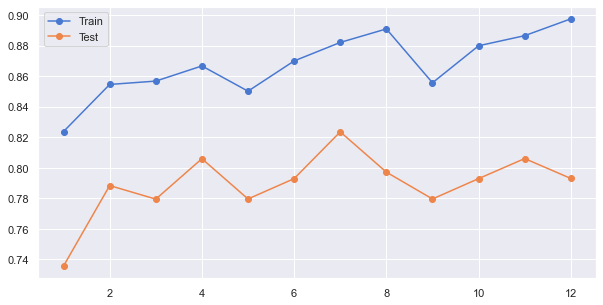

In [390]:
gb = GradientBoostingClassifier()

parameters= {
    'n_estimators':[2, 3, 4, 5],
    'max_depth':[2],
    'learning_rate':[ 0.25, 0.5, 0.55]
}

cv = GridSearchCV(gb, parameters, cv=5, return_train_score=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv) 

In [391]:
gb_best = cv.best_estimator_

### Aggregate trained models-Evaluating models on validation set

In [392]:
models= {"RF" : rf_best, "XGB": xgb_best, "SVC": svc_best, "MLP": mlp_best, "GB" : gb_best}

In [393]:
def evaluate_model(name, model, features, labels):
    start = time()
    global pred
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    print("{} // Accuracy: {} // Precision: {} // Recall: {} // F1: {} // Latency: {}ms \n".format(name, 
                                                                                                   accuracy,
                                                                                                   precision,
                                                                                                   recall,
                                                                                                   f1,
                                                                                                   round((end - start), 3)))
        

In [394]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

RF // Accuracy: 0.84 // Precision: 0.774 // Recall: 0.96 // F1: 0.857 // Latency: 0.016ms 

XGB // Accuracy: 0.82 // Precision: 0.786 // Recall: 0.88 // F1: 0.83 // Latency: 0.001ms 

SVC // Accuracy: 0.84 // Precision: 0.774 // Recall: 0.96 // F1: 0.857 // Latency: 0.001ms 

MLP // Accuracy: 0.84 // Precision: 0.774 // Recall: 0.96 // F1: 0.857 // Latency: 0.001ms 

GB // Accuracy: 0.8 // Precision: 0.8 // Recall: 0.8 // F1: 0.8 // Latency: 0.0ms 



# Evaluate best model on test set

In [399]:
evaluate_model("XGBoost", models["XGB"], te_features, te_labels)

XGBoost // Accuracy: 0.885 // Precision: 0.933 // Recall: 0.875 // F1: 0.903 // Latency: 0.004ms 



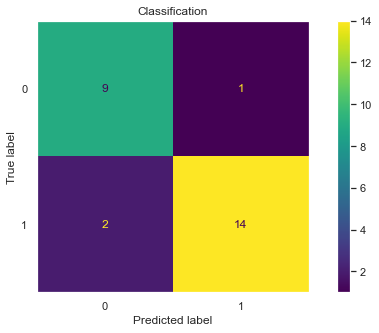

In [400]:
cm = confusion_matrix(te_labels, pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.title("Classification")
plt.show()

#### In the confusion matrix we can see that of the 10 people tha had low chance of heart attack 9(90%) were correctly classified and of 16 people who had high chance of heart attack 14(87.5%) were correctly classified.

#### I trained a lot of models in the training dataset, found the best estimators for each model in order to perform very well,  evaluated the models in the validation set (unseen data). 
#### I didn't  choose the model with the best performance but i took under consideration the percision(we deal with a problem of heart disease and we want as few mistakes as possible). Lastly i evaluated my model (XG Boost) in the test set (unseen data) one more time.

#### One last step will be to train the model in the whole dataset and it will be ready for use.